                                                                   Suyash Tambe
                                                                   22070126117
                                                                    AIML B2
                                                                USL LAB Practical

<span style="font-size: 105px; color: #90EE90;">Dimensionality  Reduction</span>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,accuracy_score

## Comprehensive Dataset on Online Retail Sales and Customer Data

SRC - [Dataset link](https://data.world/uci/online-retail)

This transnational data set is a treasure trove of vital business insights as it meticulously catalogues all the transactions that happened during its span. It houses rich transactional records curated by a renowned non-store online retail company based in the UK and in many other countries known for selling unique all-occasion gifts. A considerable portion of its clientele includes wholesalers; ergo, this dataset can prove instrumental for companies looking for patterns or studying purchasing trends among such businesses.

The available attributes within this dataset offer valuable pieces of information:



* InvoiceNo: This attribute refers to invoice numbers that are six-digit integral numbers uniquely assigned to every transaction logged in this system. Transactions marked with 'c' at the beginning signify cancellations - adding yet another dimension for purchase pattern analysis.

* StockCode: Stock Code corresponds with specific items as they're represented within the inventory system via 5-digit integral numbers; these allow easy identification and distinction between products.

* Description: This refers to product names, giving users qualitative knowledge about what kind of items are being bought and sold frequently.

* Quantity: These figures ascertain the volume of each product per transaction – important figures that can help understand buying trends better.

* InvoiceDate: Invoice Dates detail when each transaction was generated down to precise timestamps – invaluable when conducting time-based trend analysis or segmentation studies.

* UnitPrice: Unit prices represent how much each unit retails at — crucial for revenue calculations or cost-related analyses.


* Country: This locational attribute shows where each customer hails from, adding geographical segmentation to your data investigation toolkit.

Reading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\Unspervised learning\usl lab component\online_retail.csv")
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


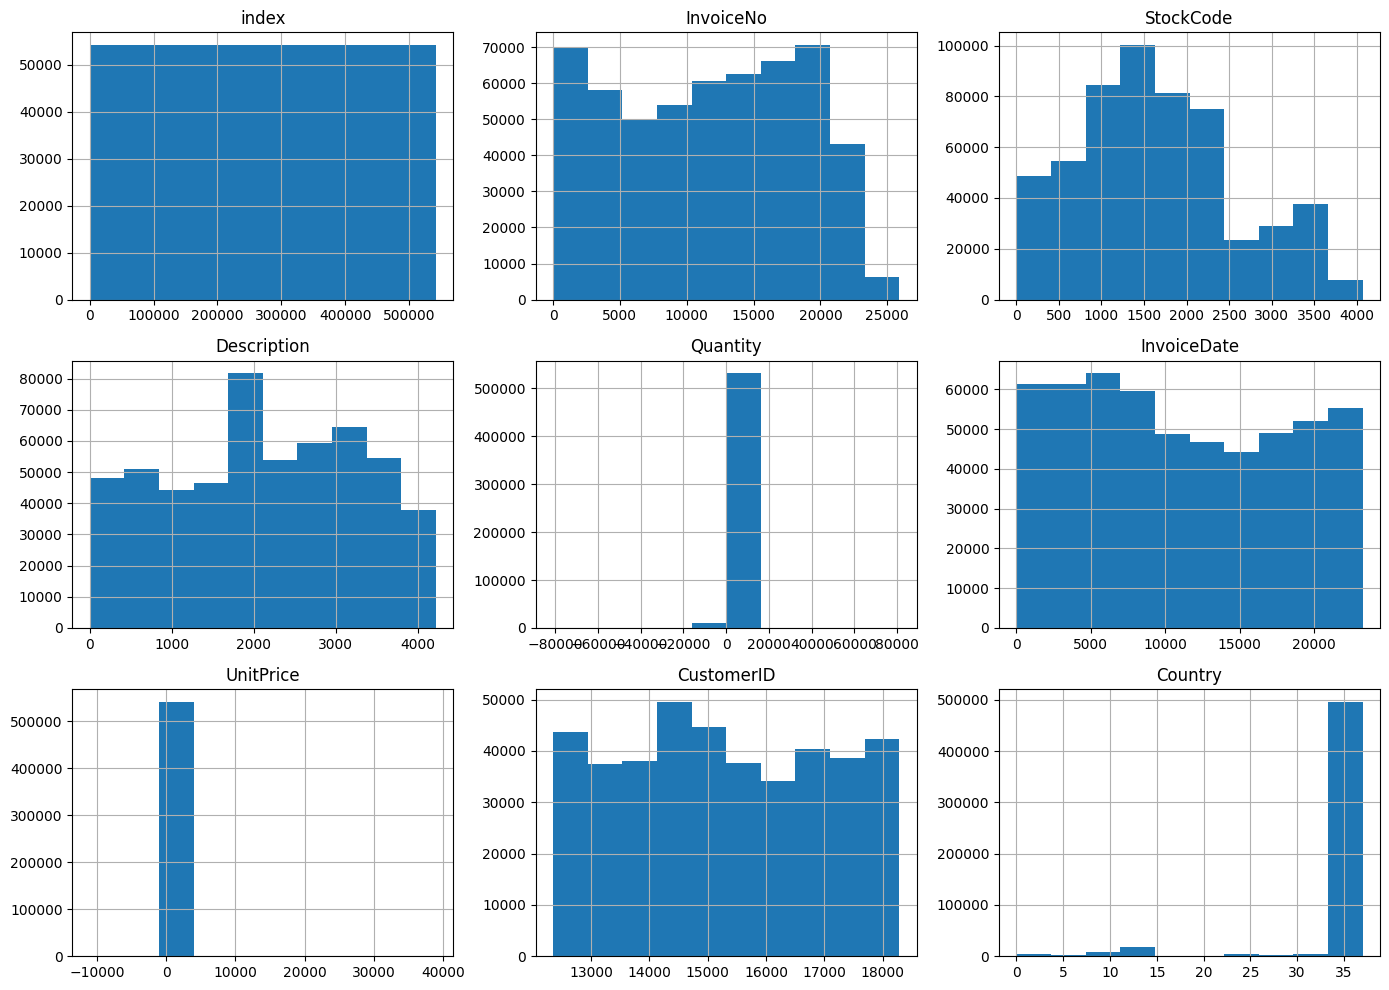

In [32]:
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

**Inferences:**

* InvoiceNo: The histogram has a somewhat uniform distribution with several spikes. This  mean that there are a few invoice numbers that occur more frequently than others.

* StockCode: There's a slightly right-skewed distribution with varying frequencies. This suggests that certain stock items are more common, with some items possibly being outliers due to their high frequency.

* Description: This has a multi-modal distribution with several peaks. This could indicate that there are specific groups of items, each with a different frequency of descriptions.

* Quantity: The distribution is extremely right-skewed with an outlier of very high quantity. This could point to bulk orders or a data entry error.
InvoiceDate: This appears to be uniformly distributed, suggesting that the data set covers a consistent range of dates without large gaps.

* UnitPrice: The histogram is very right-skewed with an outlier with a negative price, which could be indicative of refunds or data entry errors. Most of the data is clustered near the lower price range, indicating that lower-priced items are more common.

* CustomerID: The histogram shows a roughly uniform distribution with some unevenness. It's plausible that this represents a consistent spread of customers with some being more frequent.

* Country: This histogram shows that the majority of data points are from one country, with very few entries from other countries

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [4]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [5]:
df.dropna()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


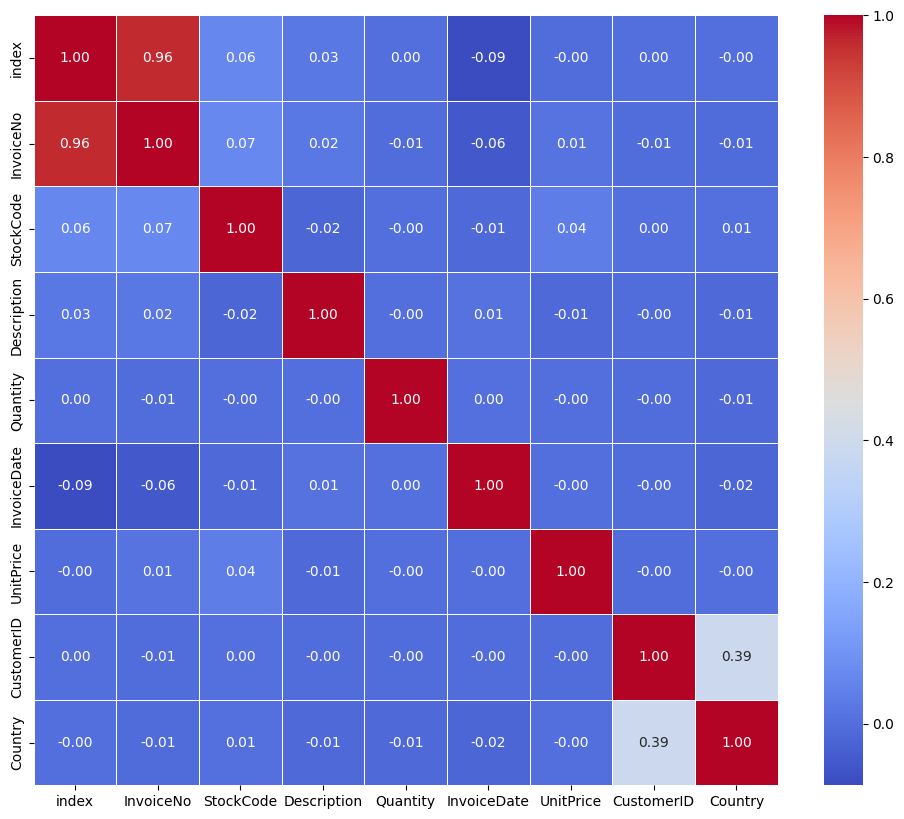

In [3]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Initialize a dictionary to store label encoders for each non-numeric column
label_encoders = {}

# Label encode non-numeric columns
for column in non_numeric_columns:
    # Initialize a LabelEncoder for the current column
    label_encoders[column] = LabelEncoder()
    
    # Fit and transform the LabelEncoder on the current column
    df[column] = label_encoders[column].fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


In [4]:
# Extract features (X) and target variable (y)
# Drop the 'Country' column to create the feature matrix (X)
X = df.drop(['Country'], axis=1)

# Select the 'Country' column as the target variable (y)
y = df['Country']


## Why we Use RandomForestClassifier?

Random Forest Classifier (RFC) is a popular choice for classification tasks, including those involving dimensionality reduction techniques like Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and Singular Value Decomposition (SVD), for several reasons:

* Robustness to Noise and Outliers: RFC is less sensitive to noisy data and outliers compared to some other classifiers, making it suitable for datasets that may contain noise or irregularities.

* Non-linear Relationships: PCA, LDA, and SVD often create transformed features that may have complex relationships with the target variable. RFC is capable of capturing non-linear relationships between features and the target, making it a good choice for classification tasks with transformed features.

* Ensemble Learning: RFC is an ensemble learning method, meaning it combines multiple individual decision trees to make predictions. This ensemble approach tends to improve the overall performance and generalization of the model.

* Handling High Dimensionality: Dimensionality reduction techniques like PCA and SVD are often used to deal with high-dimensional data. RFC can effectively handle high-dimensional feature spaces without the risk of overfitting, making it suitable for classification tasks after dimensionality reduction

## PCA

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction in data analysis and machine learning. It aims to transform a dataset consisting of possibly correlated variables into a set of linearly uncorrelated variables called principal components. These components are ordered by the amount of variance they explain in the original dataset, with the first principal component explaining the most variance.

In essence, PCA reduces the dimensionality of the data while preserving most of its original variability.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.pipeline import Pipeline  # Import Pipeline class from sklearn
from sklearn.impute import SimpleImputer  # Import SimpleImputer class from sklearn for missing value imputation
from sklearn.preprocessing import StandardScaler  # Import StandardScaler class from sklearn for feature scaling
from sklearn.decomposition import PCA  # Import PCA class from sklearn for Principal Component Analysis

# Define the pipeline with a sequence of steps
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Impute missing values with mean
    ('scaler', StandardScaler()),  # Step 2: Standardize features
    ('pca', PCA(n_components=2))  # Step 3: Perform PCA with 2 components
])


In [11]:
# Apply the pipeline to transform the training data
X_train_pca = pipeline.fit_transform(X_train)
# Apply the pipeline to transform the test data
X_test_pca = pipeline.transform(X_test)


In [12]:


# Initialize a RandomForestClassifier without PCA
rf_classifier = RandomForestClassifier()
# Train the classifier on the training data without PCA
rf_classifier.fit(X_train, y_train)
# Predict the labels for the test data without PCA
y_pred_without_pca = rf_classifier.predict(X_test)
# Compute the accuracy without PCA
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)

# Initialize a RandomForestClassifier with PCA
rf_classifier_pca = RandomForestClassifier()
# Train the classifier on the training data with PCA
rf_classifier_pca.fit(X_train_pca, y_train)
# Predict the labels for the test data with PCA
y_pred_with_pca = rf_classifier_pca.predict(X_test_pca)
# Compute the accuracy with PCA
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

# Print the accuracies
print("Accuracy without PCA:", accuracy_without_pca)
print("Accuracy with PCA:", accuracy_with_pca)

# Print the classification reports
print("Classification report without PCA:\n", classification_report(y_test, y_pred_without_pca))
print("Classification report with PCA:\n", classification_report(y_test, y_pred_with_pca))


Accuracy without PCA: 0.9965584691184883
Accuracy with PCA: 0.9151058293812626
Classification report without PCA:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       254
           1       0.99      0.91      0.95        78
           2       1.00      1.00      1.00         5
           3       0.98      0.98      0.98       402
           4       1.00      1.00      1.00         4
           5       1.00      0.93      0.96        27
           6       1.00      0.94      0.97       159
           7       1.00      0.94      0.97       123
           8       1.00      0.80      0.89         5
           9       0.98      0.88      0.93        68
          10       1.00      0.96      0.98      1708
          11       1.00      0.93      0.97        15
          12       0.97      0.91      0.94       125
          13       0.98      0.97      0.98      1727
          14       0.97      0.98      0.98      1985
          15       1

c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

**Inferences:**

* The model without PCA demonstrates superior performance in terms of accuracy and classification metrics compared to the model with PCA.

* PCA, while reducing the dimensionality of the data, may lead to a loss of information that affects the model's ability to accurately classify instances.

* In this scenario, it seems that the reduction in dimensionality achieved by PCA has adversely affected the model's performance, resulting in lower accuracy and poorer classification metrics across most classes.

* Further analysis and experimentation may be needed to determine the optimal dimensionality reduction technique or to identify if PCA can be tuned or combined with other methods to improve performance.

## LDA

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used in machine learning and statistics. It aims to find a linear combination of features that characterizes or separates two or more classes of objects or events.

The key idea behind LDA is to project the input data onto a lower-dimensional space while maximizing the separation between classes.

LDA is commonly used for classification tasks, where the goal is to predict the class labels of new samples based on the observed features.

In [6]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Initialize SimpleImputer with mean strategy to impute missing values
imputer = SimpleImputer(strategy='mean')
# Impute missing values in the feature matrix X
X_imputed = imputer.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [8]:
# Initialize LDA
n_components = 3  # we can adjust this number as needed
lda = LDA(n_components=n_components)
# Fit LDA to the training data and transform it
X_train_lda = lda.fit_transform(X_train, y_train)
# Transform the test data using the trained LDA model
X_test_lda = lda.transform(X_test)

In [9]:
# Train model without LDA
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_without_lda = rf_classifier.predict(X_test)
print("Accuracy without LDA:", accuracy_score(y_test, y_pred_without_lda))
print("Classification Report without LDA:")
print(classification_report(y_test, y_pred_without_lda))



# Train  model with LDA
rf_classifier_lda = RandomForestClassifier()
rf_classifier_lda.fit(X_train_lda, y_train)
y_pred_with_lda = rf_classifier_lda.predict(X_test_lda)
print("Accuracy with LDA:", accuracy_score(y_test, y_pred_with_lda))
print("Classification Report with LDA:")
print(classification_report(y_test, y_pred_with_lda))


Accuracy without LDA: 0.9962539905150302
Classification Report without LDA:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       254
           1       0.99      0.88      0.93        78
           2       1.00      0.80      0.89         5
           3       0.98      0.98      0.98       402
           4       1.00      1.00      1.00         4
           5       1.00      0.93      0.96        27
           6       1.00      0.92      0.96       159
           7       0.99      0.98      0.98       123
           8       1.00      0.80      0.89         5
           9       0.98      0.90      0.94        68
          10       1.00      0.96      0.98      1708
          11       1.00      0.73      0.85        15
          12       0.97      0.90      0.93       125
          13       0.98      0.97      0.97      1727
          14       0.96      0.98      0.97      1985
          15       1.00      0.89      0.94        36
     

c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

**Inferences:**

* The model without LDA performs exceptionally well overall, with high accuracy and strong performance across multiple classes.

* Introducing LDA reduces the dimensionality of the data but leads to a slight decrease in classification performance, particularly for minority classes.

* While the model with LDA still achieves high accuracy, it may not generalize as well to unseen data, especially for classes with fewer instances.

* Further analysis and fine-tuning may be necessary to determine the optimal trade-off between dimensionality reduction and classification performance.

## SVD

Singular Value Decomposition (SVD) is a matrix factorization technique used in linear algebra and numerical analysis. It decomposes a matrix into three constituent matrices:

U: Left singular vectors matrix, containing the eigenvectors of the input matrix multiplied by itself.

Σ (Sigma): Diagonal matrix of singular values, representing the square roots of the eigenvalues of the input matrix multiplied by its transpose. These singular values are ordered in descending order.

Vᵀ (Transpose of V): Right singular vectors matrix, containing the eigenvectors of the input matrix transpose multiplied by itself.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
imputer = SimpleImputer(strategy='mean')  # we can use other strategies as well, such as 'median' or 'most_frequent'

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)  # Fit the imputer and transform the training data

# Transform the test data using the fitted imputer
X_test_imputed = imputer.transform(X_test)  # Transform the test data using the fitted imputer

# Apply SVD after handling missing values
svd = TruncatedSVD(n_components=5)  # Initialize TruncatedSVD with 5 components
X_train_svd = svd.fit_transform(X_train_imputed)  # Fit and transform SVD on the imputed training data
X_test_svd = svd.transform(X_test_imputed)  # Transform the imputed test data using the fitted SVD


In [31]:
# Train model without SVD
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_without_svd = rf_classifier.predict(X_test)
print("Accuracy without SVD:", accuracy_score(y_test, y_pred_without_svd))
print("Classification Report without SVD:")
print(classification_report(y_test, y_pred_without_svd))


# Train model with SVD
rf_classifier_svd = RandomForestClassifier()
rf_classifier_svd.fit(X_train_svd, y_train)
y_pred_with_svd = rf_classifier_svd.predict(X_test_svd)
print("Accuracy with SVD:", accuracy_score(y_test, y_pred_with_svd))
print("Classification Report with SVD:")
print(classification_report(y_test, y_pred_with_svd))


Accuracy without SVD: 0.9962539905150302
Classification Report without SVD:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       254
           1       0.99      0.91      0.95        78
           2       1.00      0.80      0.89         5
           3       0.98      0.98      0.98       402
           4       1.00      1.00      1.00         4
           5       1.00      0.93      0.96        27
           6       1.00      0.94      0.97       159
           7       0.99      0.97      0.98       123
           8       1.00      0.80      0.89         5
           9       0.98      0.88      0.93        68
          10       1.00      0.95      0.98      1708
          11       1.00      0.73      0.85        15
          12       0.96      0.90      0.93       125
          13       0.98      0.97      0.97      1727
          14       0.97      0.98      0.97      1985
          15       1.00      0.86      0.93        36
     

**Inferences:**

* The model without SVD performs exceptionally well overall, with high accuracy and strong performance across multiple classes.

* Introducing SVD reduces the dimensionality of the data but leads to a slight decrease in classification performance, particularly for minority classes.

* While the model with SVD still achieves high accuracy, it may not generalize as well to unseen data, especially for classes with fewer instances.

* Further analysis and fine-tuning may be necessary to determine the optimal trade-off between dimensionality reduction and classification performance.

<span style="font-size: 40px; color: orange;">Comparative Analysis</span>



<span style="color: #90EE90;">PCA Comparative Analysis:</span>

Accuracy without PCA: 0.9966
Accuracy with PCA: 0.9151
Observations:
The accuracy decreases significantly when PCA is applied, indicating that PCA might not be suitable for this dataset or model.
Precision, recall, and F1-score for most classes are lower with PCA compared to without PCA, suggesting that PCA might not preserve important class information well.


<span style="color: #90EE90;">LDA Comparative Analysis:</span>


Accuracy without LDA: 0.9960
Accuracy with LDA: 0.9692
Observations:
The accuracy decreases slightly when LDA is applied, but it remains relatively high compared to PCA.
Precision, recall, and F1-score for most classes are slightly lower with LDA compared to without LDA, but the decrease is not as significant as with PCA.


<span style="color: #90EE90;">SVD Comparative Analysis:</span>

Accuracy without SVD: 0.9963
Accuracy with SVD: 0.9847
Observations:
The accuracy decreases moderately when SVD is applied, but it remains relatively high compared to PCA.
Precision, recall, and F1-score for most classes are slightly lower with SVD compared to without SVD, but the decrease is not as significant as with PCA.

<span style="color: #90EE90;">Overall Comparative Analysis:</span>

Among the three dimensionality reduction techniques, PCA resulted in the most significant decrease in accuracy and classification performance.
LDA and SVD, while still causing a decrease in accuracy, preserved the classification performance relatively better compared to PCA.
The choice of dimensionality reduction technique should be based on the specific characteristics of the dataset and the requirements of the classification task. In this case, LDA or SVD might be more suitable options compared to PCA.